In [ ]:
from google.colab import drive
drive.mount('/content/drive')

✅ Salary dataset created & saved as salary_data.csv
📊 Model Performance:
RMSE: 288531.57972741907
R2 Score: -2.404927300613497


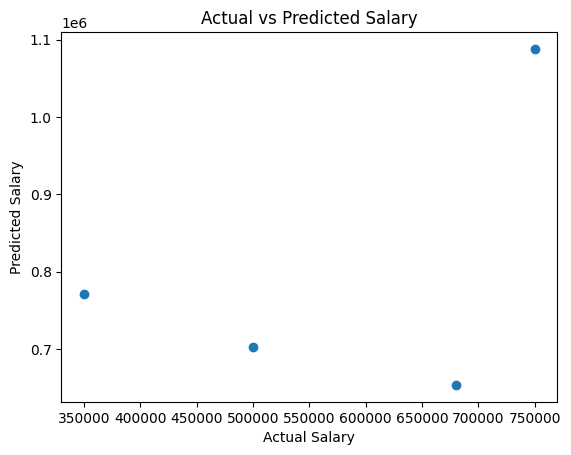

💾 Model saved as salary_model.pkl

=== Salary Prediction Tool ===
Enter years of experience: 2
Enter education (Bachelors, Masters, PhD): bachelors
Enter job role (Data Scientist, Developer, Manager, Software Engineer): data scientist
Enter location (Bangalore, Chennai, Delhi, Hyderabad, Mumbai, Pune): mumbi
Invalid input. Please enter a valid education, job role, and location from the list.
Enter years of experience: 4
Enter education (Bachelors, Masters, PhD): Bachelors
Enter job role (Data Scientist, Developer, Manager, Software Engineer): Data Scientist
Enter location (Bangalore, Chennai, Delhi, Hyderabad, Mumbai, Pune): Delhi
💰 Predicted Salary: ₹1,119,000.00 per annum


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# ============================
# 1. Import Libraries
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import pickle

# ============================
# 2. Create Sample Salary Dataset
# ============================
data = {
    'YearsExperience': [1,3,5,2,7,10,4,6,8,12,15,9,11,13,20,18,14,16,19,22],
    'Education': [
        'Bachelors','Masters','Bachelors','Masters','PhD',
        'Bachelors','Masters','Bachelors','Masters','PhD',
        'Bachelors','Masters','PhD','Masters','PhD',
        'Bachelors','Masters','Bachelors','PhD','Masters'
    ],
    'JobRole': [
        'Developer','Data Scientist','Software Engineer','Developer','Data Scientist',
        'Manager','Software Engineer','Developer','Data Scientist','Manager',
        'Developer','Data Scientist','Manager','Software Engineer','Manager',
        'Developer','Data Scientist','Software Engineer','Manager','Developer'
    ],
    'Location': [
        'Bangalore','Delhi','Mumbai','Hyderabad','Bangalore',
        'Delhi','Pune','Chennai','Mumbai','Bangalore',
        'Delhi','Hyderabad','Mumbai','Pune','Chennai',
        'Bangalore','Delhi','Pune','Mumbai','Hyderabad'
    ],
    'Salary': [
        350000,750000,650000,450000,1200000,
        1500000,700000,800000,1400000,2000000,
        400000,950000,1800000,720000,2200000,
        500000,1300000,680000,2100000,600000
    ]
}
df = pd.DataFrame(data)

# Save dataset
df.to_csv("salary_data.csv", index=False)

print("✅ Salary dataset created & saved as salary_data.csv")

# ============================
# 3. Encode Categorical Columns
# ============================
le_education = LabelEncoder()
le_jobrole = LabelEncoder()
le_location = LabelEncoder()

df['Education'] = le_education.fit_transform(df['Education'])
df['JobRole'] = le_jobrole.fit_transform(df['JobRole'])
df['Location'] = le_location.fit_transform(df['Location'])

# ============================
# 4. Split Data
# ============================
X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ============================
# 5. Train Model
# ============================
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ============================
# 6. Evaluate Model
# ============================
y_pred = model.predict(X_test)

# Option 1: If sklearn ≥ 0.22
rmse = mean_squared_error(y_test, y_pred) ** 0.5

# Option 2: If sklearn < 0.22
# rmse = mean_squared_error(y_test, y_pred) ** 0.5

r2 = r2_score(y_test, y_pred)

print("📊 Model Performance:")
print("RMSE:", rmse)
print("R2 Score:", r2)

# ============================
# 7. Visualization
# ============================
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

# ============================
# 8. Save Model
# ============================
pickle.dump(model, open('salary_model.pkl', 'wb'))
print("💾 Model saved as salary_model.pkl")

# ============================
# 9. Interactive Prediction
# ============================
print("\n=== Salary Prediction Tool ===")

# Get valid inputs
while True:
    years_experience = float(input("Enter years of experience: "))
    education = input(f"Enter education ({', '.join(le_education.classes_)}): ")
    job_role = input(f"Enter job role ({', '.join(le_jobrole.classes_)}): ")
    location = input(f"Enter location ({', '.join(le_location.classes_)}): ")

    if education in le_education.classes_ and job_role in le_jobrole.classes_ and location in le_location.classes_:
        break
    else:
        print("Invalid input. Please enter a valid education, job role, and location from the list.")

# Encode inputs
education_encoded = le_education.transform([education])[0]
jobrole_encoded = le_jobrole.transform([job_role])[0]
location_encoded = le_location.transform([location])[0]

# Create feature array
input_features = np.array([[years_experience, education_encoded, jobrole_encoded, location_encoded]])

# Predict salary
predicted_salary = model.predict(input_features)
print(f"💰 Predicted Salary: ₹{predicted_salary[0]:,.2f} per annum")

# New Section